In [1]:
%matplotlib inline
from IPython.display import display, HTML
from analysis import Analysis
from models import *
analysis = Analysis('weather', normalize=True, logger=display)
analysis.load_data()

//anaconda/envs/python35/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Now setting the predictor to be the avg temperature value.

The features will be the year, month, and day of the current observation as well as the predictor value.

In [2]:
predictor = 'actual_mean_temp'
analysis.data['year'] = analysis.data['date'].dt.year
analysis.data['month'] = analysis.data['date'].dt.month
analysis.data['day'] = analysis.data['date'].dt.day
features = ['year', 'month', 'day', predictor]
analysis.set_feature_predictor_columns(features, predictor)
analysis.train_test_split()

'Number of train data points: 292'

'Number of test data points: 73'

Set some parameters that are used by some of the models

In [3]:
# The number of days to chunk inputs by
NUM_DAYS = 5

# 
NUM_FEATURES = len(analysis.features)

Going to try each different model.

ARIMA

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1825.963, BIC=1859.054, Fit time=3.023 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1970.259, BIC=1999.673, Fit time=2.326 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1833.183, BIC=1862.597, Fit time=2.225 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1833.731, BIC=1870.499, Fit time=2.234 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1985.462, BIC=2014.876, Fit time=0.829 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=nan, BIC=nan, Fit time=0.416 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1839.785, BIC=1880.229, Fit time=7.108 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1818.961, BIC=1855.729, Fit time=2.276 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 1

'Train Error: 5.37533806909  Num NaN: 0'

'Test Error: 6.82845547802    Num NaN: 0'

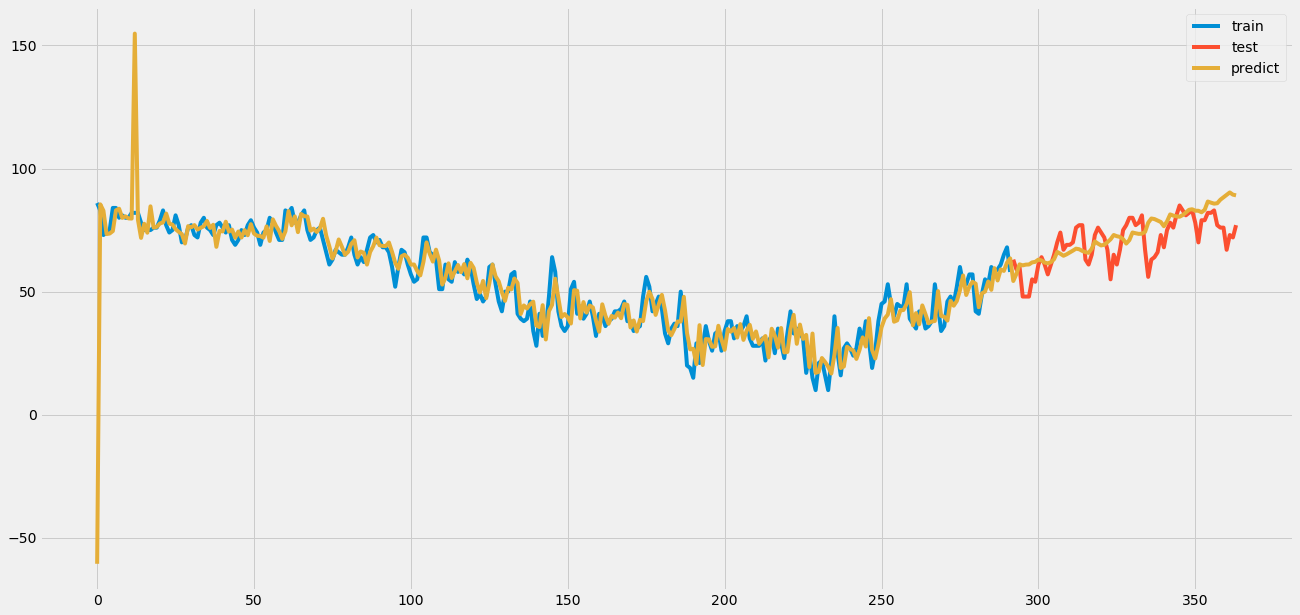

In [4]:
model = ARIMA(analysis)
analysis.run_model(model)

'Train Error: 3.90410958904  Num NaN: 0'

'Test Error: 14.5083333333    Num NaN: 0'

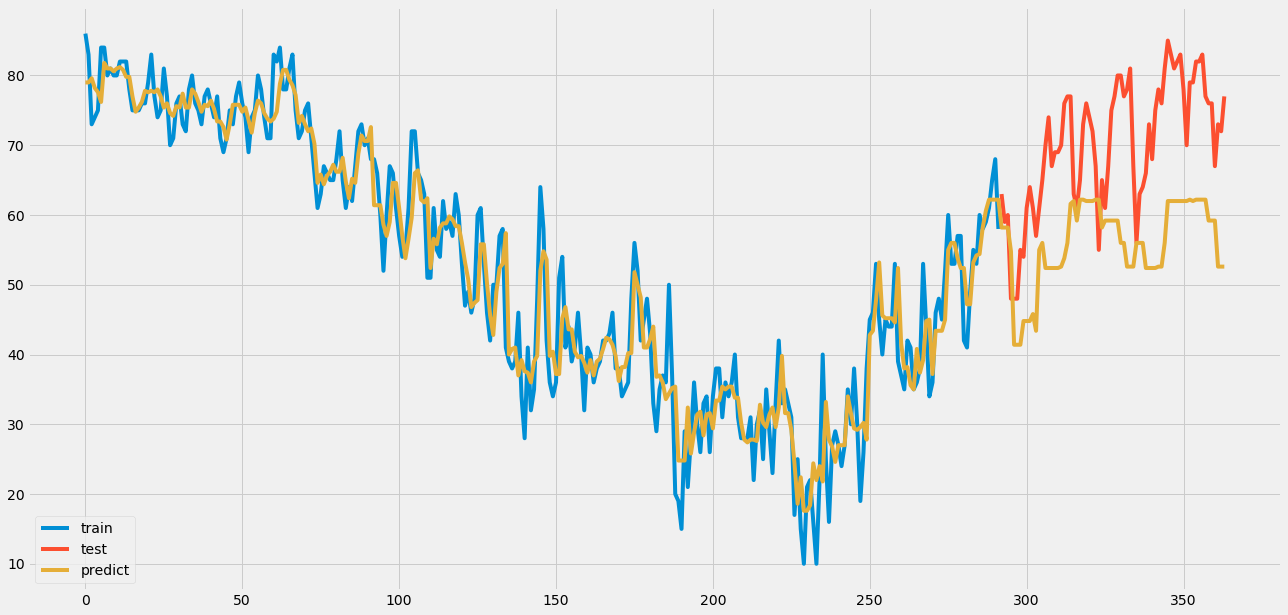

In [5]:
from sklearn.neighbors import KNeighborsRegressor
model = Regressor(analysis, KNeighborsRegressor)
analysis.run_model(model)

//anaconda/envs/python35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


'Train Error: 10.8355765946  Num NaN: 0'

'Test Error: 14.017543237    Num NaN: 0'

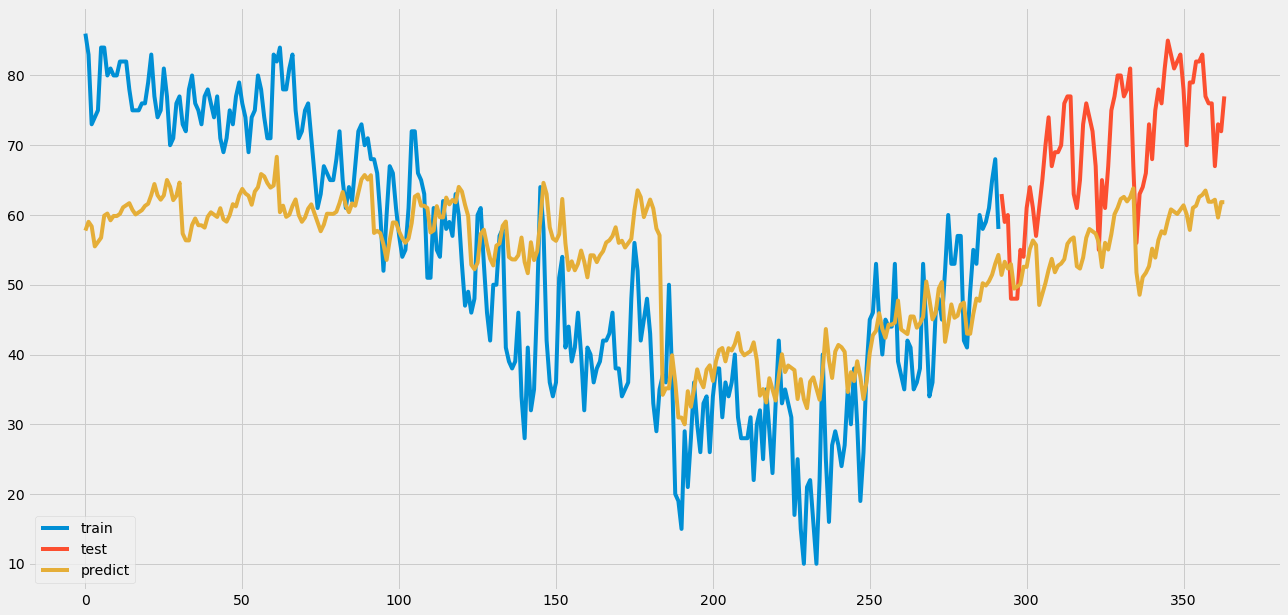

In [6]:
from sklearn.linear_model import SGDRegressor
model = Regressor(analysis, SGDRegressor)
analysis.run_model(model)

'Train Error: 2.06575342466  Num NaN: 0'

'Test Error: 4.7    Num NaN: 0'

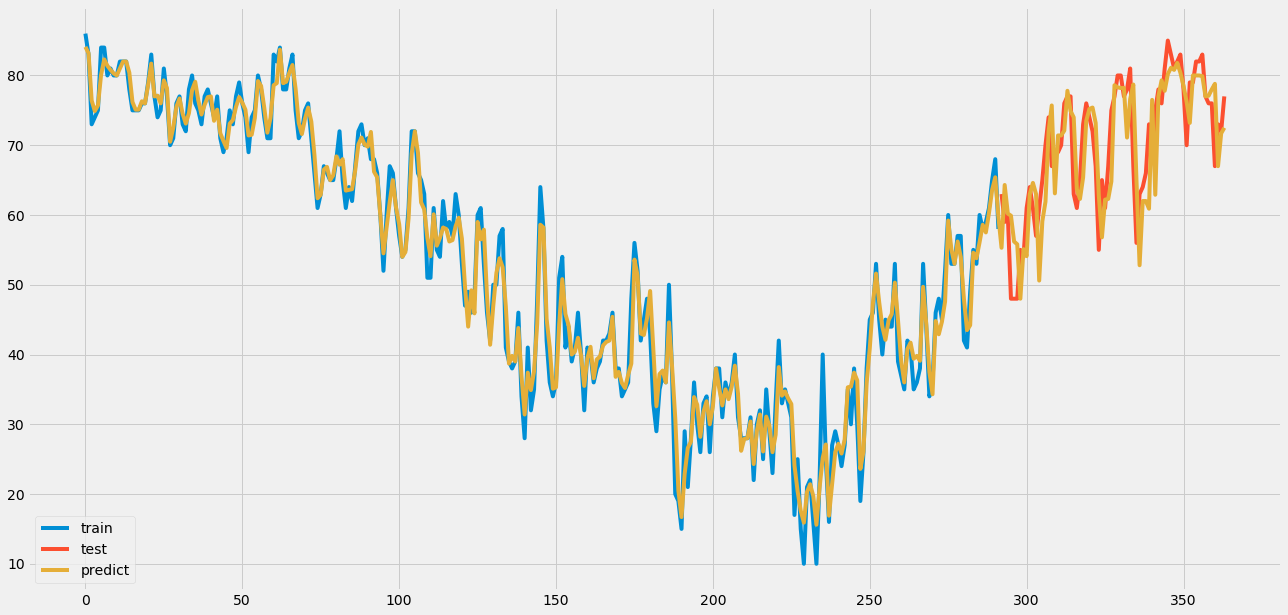

In [7]:
from sklearn.ensemble import RandomForestRegressor
model = Regressor(analysis, RandomForestRegressor)
analysis.run_model(model)

'Train Error: 4.3592430422  Num NaN: 0'

'Test Error: 4.60692908575    Num NaN: 0'

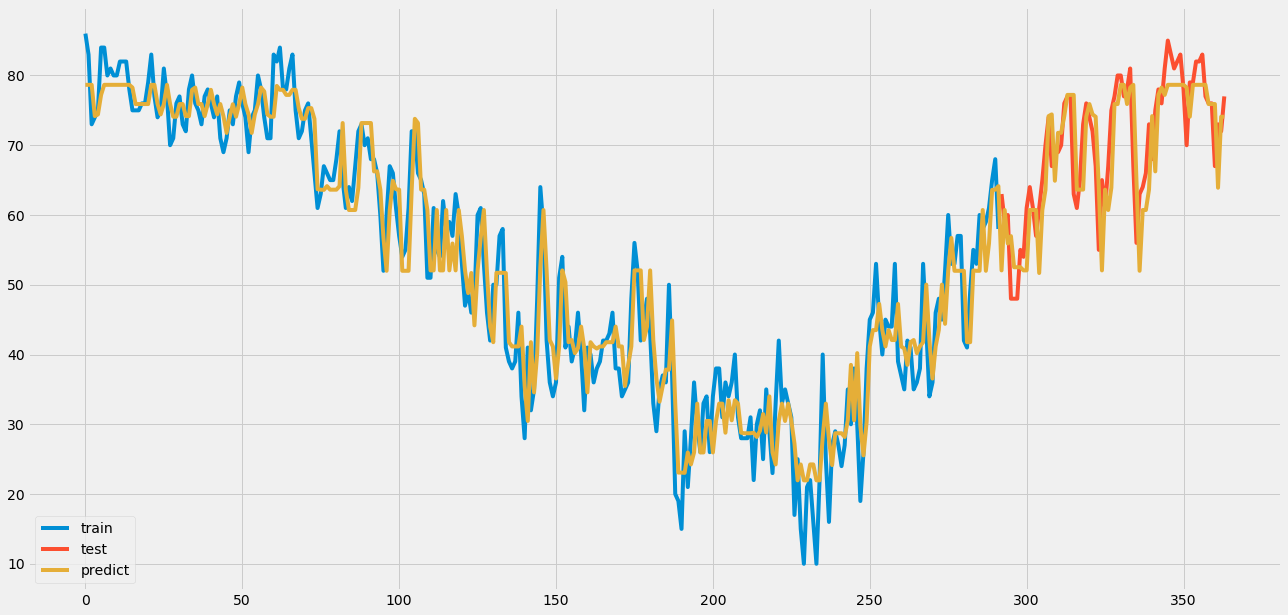

In [8]:
from sklearn.ensemble import AdaBoostRegressor
model = Regressor(analysis, AdaBoostRegressor)
analysis.run_model(model)

'Train Error: 3.26525029744  Num NaN: 0'

'Test Error: 141.828650581    Num NaN: 0'

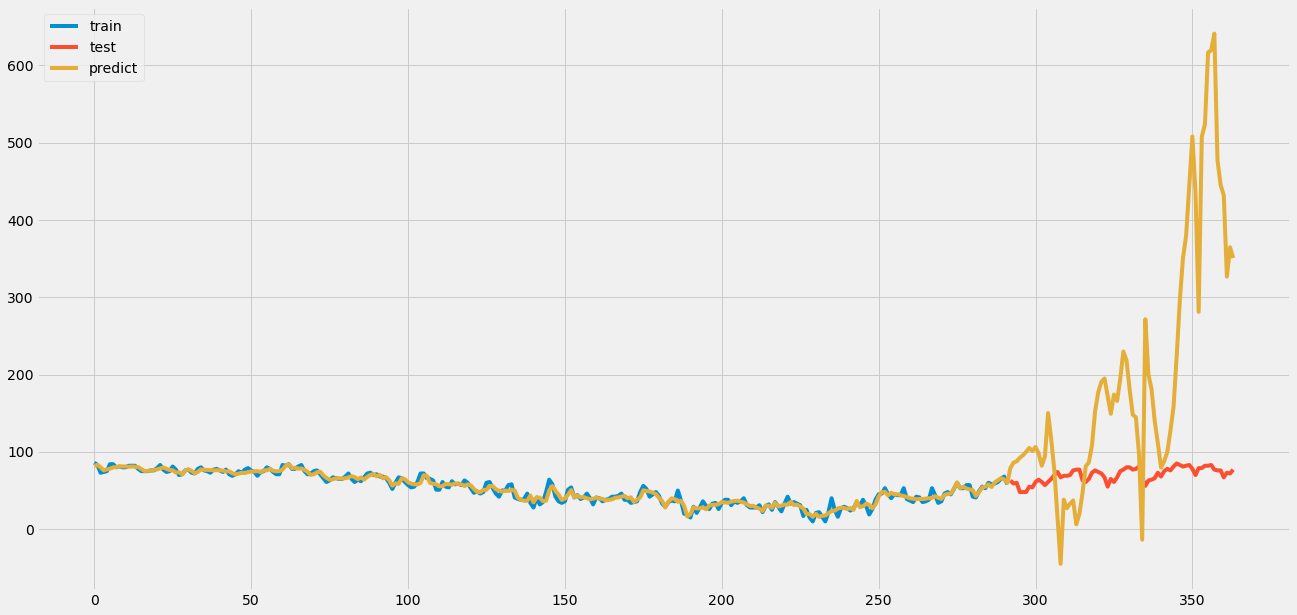

In [9]:
from sklearn.gaussian_process import GaussianProcessRegressor
model = Regressor(analysis, GaussianProcessRegressor)
analysis.run_model(model)

Now going to use models that require chunking.  We perform chunking by taking the time series:

x = (x0, x1, x2, x3, ...)
y = (x1, x2, x3, x4, ...)

and modifying it such that if the chunk parameter, c, is set to 3:

x = ((x0, x1, x2), (x1, x2, x3), (x2, x3, x4), ...)
y = (x3, x4, x5, ...)

This results in the first c values in not having a prediction and thus (Num NaN is > 0 and == c).



LinearRegression

'Train Error: 5.50764140048  Num NaN: 5'

'Test Error: 6.72045814312    Num NaN: 5'

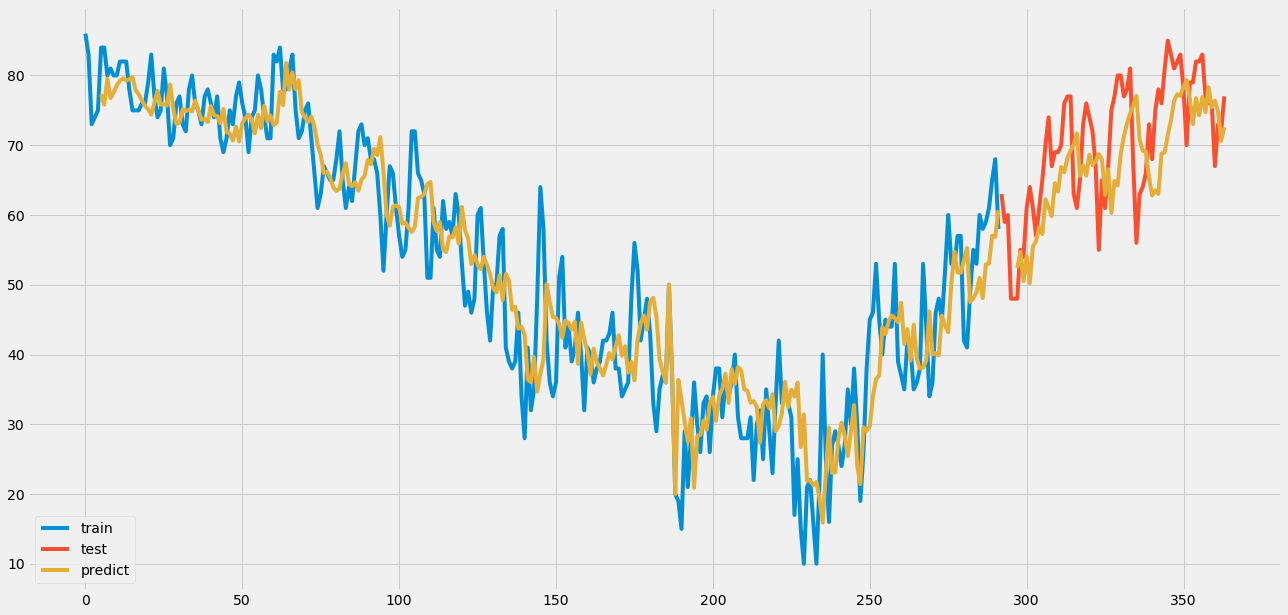

In [10]:
model = LinearRegression(analysis, num_days=NUM_DAYS)
analysis.run_model(model)

FeedForward Neural Network

Using TensorFlow backend.


Train on 287 samples, validate on 67 samples
Epoch 1/10
 - 0s - loss: 0.1838 - val_loss: 0.3084
Epoch 2/10
 - 0s - loss: 0.1430 - val_loss: 0.2883
Epoch 3/10
 - 0s - loss: 0.1337 - val_loss: 0.2745
Epoch 4/10
 - 0s - loss: 0.1238 - val_loss: 0.2856
Epoch 5/10
 - 0s - loss: 0.1157 - val_loss: 0.2840
Epoch 6/10
 - 0s - loss: 0.1085 - val_loss: 0.2442
Epoch 7/10
 - 0s - loss: 0.1016 - val_loss: 0.2030
Epoch 8/10
 - 0s - loss: 0.0961 - val_loss: 0.1816
Epoch 9/10
 - 0s - loss: 0.0940 - val_loss: 0.2252
Epoch 10/10
 - 0s - loss: 0.0913 - val_loss: 0.1896


'Train Error: 6.69438811379  Num NaN: 5'

'Test Error: 14.2177648402    Num NaN: 5'

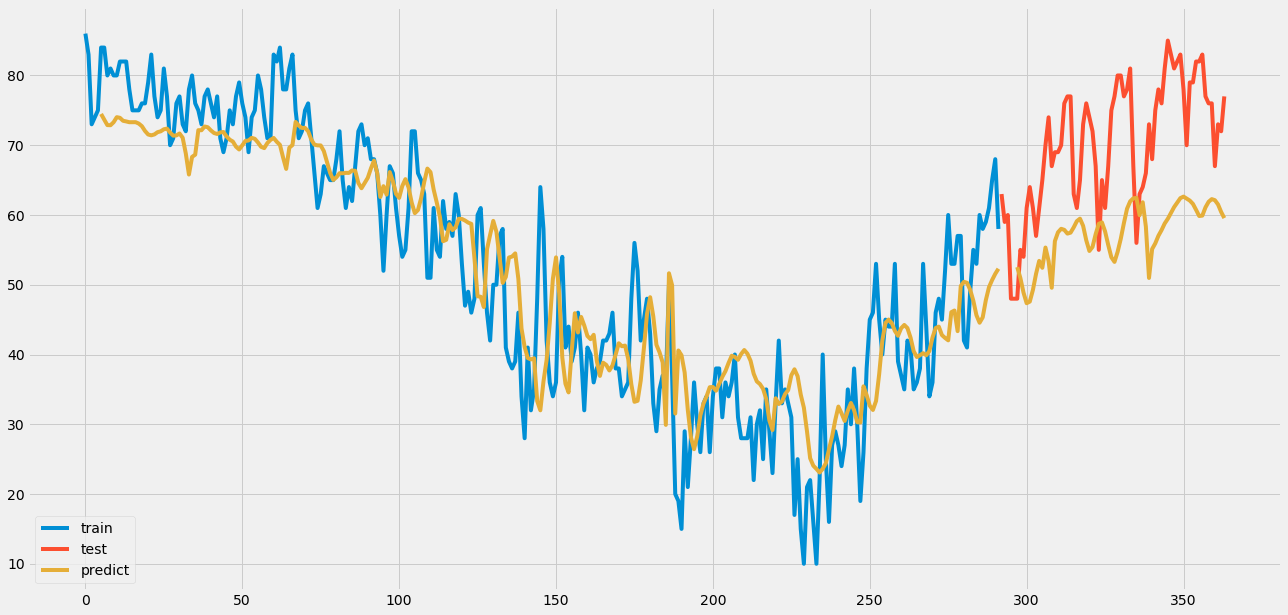

In [11]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

nn = Sequential()
nn.add(layers.Dense(25, activation='tanh',
                    batch_input_shape=(None, NUM_DAYS * NUM_FEATURES)))
nn.add(layers.Dense(10, activation='tanh'))
nn.add(layers.Dense(1, activation='tanh'))
nn.compile(loss='mae', optimizer='sgd')

model = FNN(analysis, nn, num_days=NUM_DAYS)
analysis.run_model(model)


Recurrent Neural Network

Train on 287 samples, validate on 67 samples
Epoch 1/10
 - 0s - loss: 0.2544 - val_loss: 0.3861
Epoch 2/10
 - 0s - loss: 0.2411 - val_loss: 0.1954
Epoch 3/10
 - 0s - loss: 0.2385 - val_loss: 0.3198
Epoch 4/10
 - 0s - loss: 0.2339 - val_loss: 0.1949
Epoch 5/10
 - 0s - loss: 0.2275 - val_loss: 0.1997
Epoch 6/10
 - 0s - loss: 0.2378 - val_loss: 0.1206
Epoch 7/10
 - 0s - loss: 0.2421 - val_loss: 0.1768
Epoch 8/10
 - 0s - loss: 0.2441 - val_loss: 0.0946
Epoch 9/10
 - 0s - loss: 0.2449 - val_loss: 0.1442
Epoch 10/10
 - 0s - loss: 0.2421 - val_loss: 0.1549


'Train Error: 17.7564946085  Num NaN: 5'

'Test Error: 11.6186532547    Num NaN: 5'

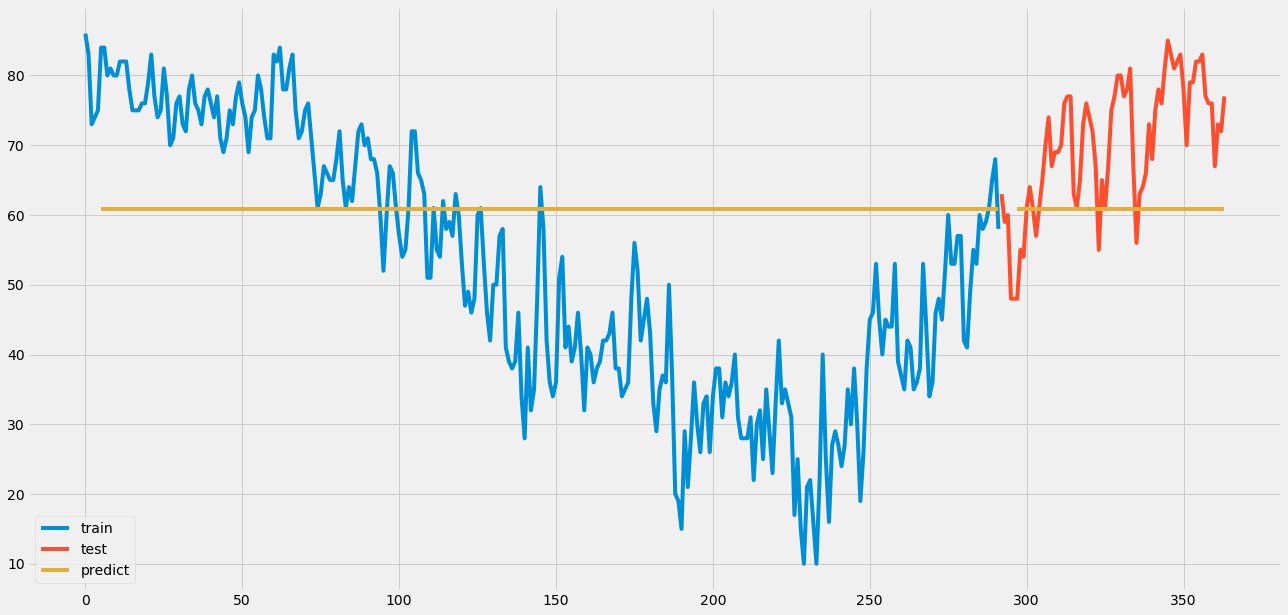

In [12]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(NUM_DAYS, NUM_FEATURES)))
nn.add(layers.SimpleRNN(50, input_shape=(NUM_DAYS, NUM_FEATURES)))

nn.add(layers.Dense(1, activation='tanh'))
nn.add(layers.Dense(1, activation='linear'))
nn.compile(loss='mae', optimizer=optimizers.RMSprop(lr=0.1))
        
model = RNNSingle(analysis, nn, num_days=NUM_DAYS, mask_value=mask_value)
analysis.run_model(model)

LSTM Network

In [13]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(NUM_DAYS, NUM_FEATURES)))
nn.add(layers.LSTM(50, activation='tanh', input_shape=(NUM_DAYS, NUM_FEATURES), return_sequences=True))

nn.add(layers.TimeDistributed(layers.Dense(10, activation='relu')))
nn.add(layers.TimeDistributed(layers.Dense(1, activation='tanh')))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mae', optimizer='rmsprop')

model = RNNMultiple(analysis, nn, num_days=NUM_DAYS, mask_value=mask_value)
analysis.run_model(model)

Train on 59 samples, validate on 15 samples
Epoch 1/10
 - 1s - loss: 0.8709 - val_loss: 0.5751
Epoch 2/10
 - 0s - loss: 0.5819 - val_loss: 0.3523
Epoch 3/10
 - 0s - loss: 0.4027 - val_loss: 0.2349
Epoch 4/10
 - 0s - loss: 0.2910 - val_loss: 0.1696
Epoch 5/10
 - 0s - loss: 0.2194 - val_loss: 0.1288
Epoch 6/10
 - 0s - loss: 0.1714 - val_loss: 0.1010
Epoch 7/10
 - 0s - loss: 0.1376 - val_loss: 0.0803
Epoch 8/10
 - 0s - loss: 0.1119 - val_loss: 0.0638
Epoch 9/10
 - 0s - loss: 0.0912 - val_loss: 0.0506
Epoch 10/10
 - 0s - loss: 0.0746 - val_loss: 0.0397


IndexError: index 295 is out of bounds for axis 1 with size 295

In [ ]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(len(analysis.x_train), NUM_FEATURES)))
nn.add(layers.LSTM(50, activation='tanh', input_shape=(len(analysis.x_train), NUM_FEATURES), return_sequences=True))

nn.add(layers.TimeDistributed(layers.Dense(10, activation='relu')))
nn.add(layers.TimeDistributed(layers.Dense(1, activation='tanh')))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mae', optimizer='rmsprop')

model = RNNAll(analysis, nn, mask_value=mask_value)
analysis.run_model(model)